In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
matplotlib.rc('font',family = 'NanumGothic')
matplotlib.rc('axes', unicode_minus = False)

In [5]:
df = pd.read_csv('./member_data_set.csv')

In [6]:
df.head()

,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,고객분류,총결제금액,총사용포인트,Y
0,여,기혼,인천,37.0,국민은행,인스타그램,Yes,이탈고객,16314.0,9486.0,1
1,여,기혼,제주,33.0,국민은행,검색광고,Yes,이탈고객,3800.0,1810.0,1
2,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,이탈고객,95844.0,23196.0,0
3,여,미혼,경남,34.0,기업은행,지인추천,No,이탈고객,116532.0,35388.0,0
4,여,기혼,서울,32.0,신한은행,직접검색,Yes,이탈고객,19900.0,8020.0,1


In [7]:
df = pd.get_dummies(df)

del df['총사용포인트']
del df['고객분류_미구매고객']
del df['고객분류_이탈고객']
del df['고객분류_잠재이탈고객']
del df['고객분류_재구매가능성 고객']
del df['고객분류_현재고객']

In [8]:
df.isnull().sum()

연령               0
총결제금액            0
Y                0
성별_남             0
성별_여             0
결혼유무_기혼          0
결혼유무_미혼          0
거주지역_강원          0
거주지역_경기          0
거주지역_경남          0
거주지역_경북          0
거주지역_광주          0
거주지역_대구          0
거주지역_대전          0
거주지역_부산          0
거주지역_서울          0
거주지역_인천          0
거주지역_전남          0
거주지역_전북          0
거주지역_제주          0
거주지역_충남          0
거주지역_충북          0
결제등록카드_BC카드      0
결제등록카드_SC제일은행    0
결제등록카드_경남은행      0
결제등록카드_광주은행      0
결제등록카드_국민은행      0
결제등록카드_국민카드      0
결제등록카드_기업은행      0
결제등록카드_농협중앙회     0
결제등록카드_농협회원조합    0
결제등록카드_대구은행      0
결제등록카드_롯데카드      0
결제등록카드_미래에셋증권    0
결제등록카드_부산은행      0
결제등록카드_삼성카드      0
결제등록카드_새마을금고     0
결제등록카드_신한은행      0
결제등록카드_신한카드      0
결제등록카드_신협중앙회     0
결제등록카드_씨티은행      0
결제등록카드_외환은행      0
결제등록카드_우리은행      0
결제등록카드_우체국       0
결제등록카드_하나은행      0
결제등록카드_현대카드      0
유입경로_검색광고        0
유입경로_네이버블로그      0
유입경로_네이버카페       0
유입경로_매장쿠폰        0
유입경로_오픈마켓        0
유입경로_이마트         0
유입경로_인스타그램  

In [9]:
df_raw_x = df.drop('Y',axis = 1, inplace = False )
df_raw_y = df['Y']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,test_size=0.3,random_state = 1434)
print("분할 전 설명변수 데이터:",df_raw_x.shape)
print("분할 후 설명변수 데이터:Train",df_train_x.shape,"Test",df_test_x.shape)

분할 전 설명변수 데이터: (67416, 57)
분할 후 설명변수 데이터:Train (47191, 57) Test (20225, 57)


In [10]:
svm_uncustomized = SVC(random_state =1434)
svm_uncustomized.fit(df_train_x,df_train_y)
print(svm_uncustomized.score(df_train_x,df_train_y))
print(svm_uncustomized.score(df_test_x,df_test_y).round(3))

0.7848318535313937
0.787


In [11]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,연령,총결제금액,성별_남,성별_여,결혼유무_기혼,결혼유무_미혼,거주지역_강원,거주지역_경기,거주지역_경남,거주지역_경북,...,유입경로_네이버카페,유입경로_매장쿠폰,유입경로_오픈마켓,유입경로_이마트,유입경로_인스타그램,유입경로_지인추천,유입경로_직접검색,유입경로_페이스북,자녀여부_No,자녀여부_Yes
0,1.425097,-0.416590,-0.178026,0.178026,0.428132,-0.428132,-0.300867,-0.483971,-0.196406,-0.208166,...,-0.275783,-0.073882,-0.160692,-0.051161,1.267858,-0.330646,-0.119362,-0.1333,-0.491032,0.491032
1,0.067410,-0.584832,-0.178026,0.178026,0.428132,-0.428132,-0.300867,-0.483971,-0.196406,-0.208166,...,-0.275783,-0.073882,-0.160692,-0.051161,-0.788732,-0.330646,-0.119362,-0.1333,-0.491032,0.491032
2,-0.272012,0.652636,-0.178026,0.178026,0.428132,-0.428132,-0.300867,-0.483971,-0.196406,-0.208166,...,-0.275783,-0.073882,-0.160692,-0.051161,-0.788732,-0.330646,-0.119362,-0.1333,-0.491032,0.491032
3,0.406832,0.930772,-0.178026,0.178026,-2.335726,2.335726,-0.300867,-0.483971,5.091495,-0.208166,...,-0.275783,-0.073882,-0.160692,-0.051161,-0.788732,3.024384,-0.119362,-0.1333,2.036526,-2.036526
4,-0.272012,-0.368379,-0.178026,0.178026,0.428132,-0.428132,-0.300867,-0.483971,-0.196406,-0.208166,...,-0.275783,-0.073882,-0.160692,-0.051161,-0.788732,-0.330646,8.377889,-0.1333,-0.491032,0.491032


In [12]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.3,random_state = 1434)
print('train data X size:{}'.format(df_scaled_train_x.shape))
print('test data X size:{}'.format(df_scaled_test_x.shape))

train data X size:(47191, 57)
test data X size:(20225, 57)


In [13]:
svm_scaled =SVC(random_state= 1434)
svm_scaled.fit(df_scaled_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(svm_scaled.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(svm_scaled.score(df_scaled_test_x,df_test_y)))

Accuracy on training set:0.787
Accuracy on test set:0.774


In [14]:
train_accuracy=[];test_accuracy=[]
para_c = [10**c for c in range(-2,3)]

for v_C in para_c:
    svm = SVC(C=v_C ,random_state=1434)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy

In [15]:
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.676,0.679
1,0.10,0.753,0.754
2,1.00,0.787,0.774
3,10.00,0.807,0.763
4,100.00,0.820,0.748


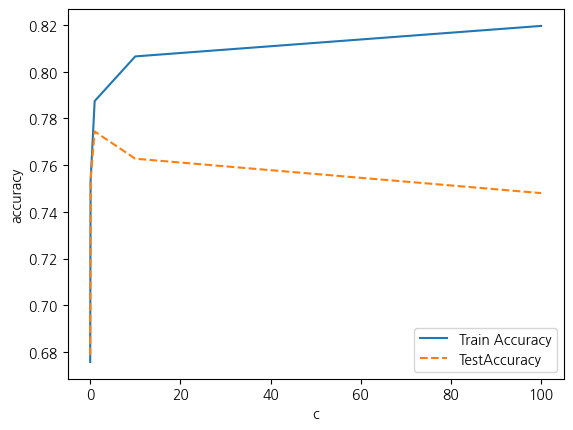

In [16]:
plt.plot(para_c,train_accuracy, linestyle="-",label='Train Accuracy')
plt.plot(para_c,test_accuracy, linestyle="--",label='TestAccuracy')
plt.ylabel('accuracy'); plt.xlabel('c')
plt.legend()

----------------------------------------------

In [17]:
train_accuracy=[];test_accuracy=[]
para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C=1.0,random_state=1434)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy

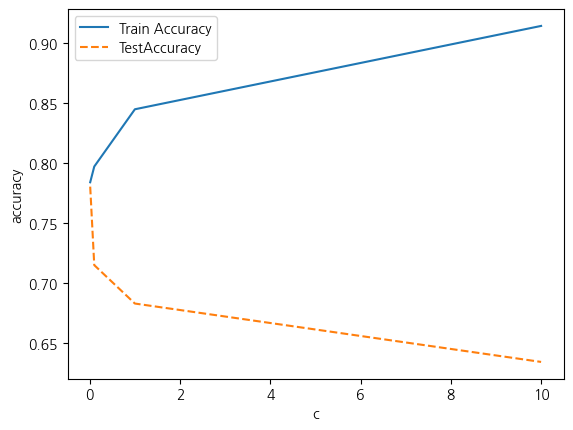

In [18]:
plt.plot(para_gamma,train_accuracy, linestyle="-",label='Train Accuracy')
plt.plot(para_gamma,test_accuracy, linestyle="--",label='TestAccuracy')
plt.ylabel('accuracy'); plt.xlabel('c')
plt.legend()

-------------------------------------------------------------

In [19]:
svc_final = SVC( gamma = 0.03, C=0.85,random_state=1434)
svc_final.fit(df_scaled_train_x,df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)

print('train:{:.3f}'.format(svc_final.score(df_scaled_train_x,df_train_y)))
print('test:{:.3f}'.format(svc_final.score(df_scaled_test_x,df_test_y)))
print('confusion:\n{}'.format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

train:0.790
test:0.764
confusion:
[[ 4668  3856]
 [  907 10794]]
              precision    recall  f1-score   support

           0      0.837     0.548     0.662      8524
           1      0.737     0.922     0.819     11701

    accuracy                          0.764     20225
   macro avg      0.787     0.735     0.741     20225
weighted avg      0.779     0.764     0.753     20225

